# 灰度变换
&emsp;灰度变换是图像处理的基本操作，数学描述为：
$$g(x,y)=T(f(x,y))$$
&emsp;其中：$f(x,y)$是输入图像在$(x,y)$位置的灰度值，$g(x,y)$为该位置的输出值，$T()$是变换函数。

&emsp;灰度变换属于点操作，即：每个位置的图像输出值只与该位置的输入值有关，最终的效果取决于变换函数。

&emsp;这个的例子包含两个部分：首先根据确定变换曲线，然后对图像进行灰度变化
## polyfit 函数
&emsp;Numpy提供了多项式拟合函数 a=polyfit(x,y,n)
&emsp;其中n表示多项式的最高阶数，x，y为将要拟合的数据，它是用数组的方式输入.输出a为拟合多项式的系数
$$
y(x)=a_nx^n+a_{n-1}x^{n-1}+\cdots + a_1x+a_0
$$
## poly1d
&emsp;Numpy的poly1d函数能根据输入的多项式的系数构建多项式，并计算任意输入对应的输出

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

%matplotlib inline

# 模拟生成10个离散的点
xp = np.linspace(0, 1, 10)
y1 = np.log10(1+xp)    #像素值取对数
#y1 = xp ** 2           #像素求平方     
y2 = np.sqrt(xp)       #像素值开方

In [11]:
# 通过多项式拟合得到拟合曲线
z_1 = np.poly1d(np.polyfit(xp, y1, 6))  
z_2 = np.poly1d(np.polyfit(xp, y2, 6))

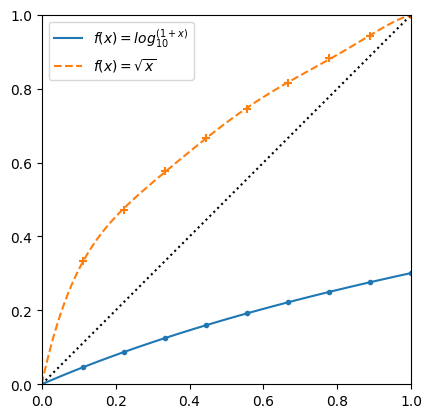

In [12]:
# 绘制拟合曲线
# 这里也展示了显示单张图片的一种方法
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
x = np.linspace(0, 1, 100)
ax.plot(x,x,linestyle=':',color = 'black')
ax.scatter(xp, y1, marker='.')
ax.plot(x, z_1(x),linestyle='-', label='$f(x)=log_{10}^{(1+x)}$')
ax.scatter(xp,y2, marker='+')
ax.plot(x, z_2(x),linestyle='--',label='$f(x)=\sqrt{x}$')
plt.ylim(0,1)
plt.xlim(0,1)
plt.legend()
plt.show()

In [13]:
# 根据拟合曲线构建映射表
# 注意图像处理中需要进行幅度限制处理
map_1 = np.zeros(256)
map_2 = np.zeros(256)
x = np.linspace(0, 1, 256)
for i in np.arange(256):
    temp = z_1(x[i])
    if temp > 1:
        map_1[i] = 1
    elif temp < 0:
        map_1[i] = 0
    else:
        map_1[i] = temp

for i in np.arange(256):
    temp = z_2(x[i])
    if temp > 1:
        map_2[i] = 1
    elif z_2(x[i]) < 0:
        map_2[i] = 0
    else:
        map_2[i] = temp

# map_1 = map_1.astype(np.uint8)
# map_2 = map_2.astype(np.uint8)

In [14]:
# 通过查表方式实现映射
def f_1(x):
    return map_1[x]
def f_2(x):
    return map_2[x]

In [15]:
im = plt.imread("images/lenna.jpg") # 加载当前文件夹的图片

In [16]:
# f_1仅对单个标量进行操作，frompyfunc函数让其支持对图像每个像素的处理

im_1 = np.frompyfunc(f_1,1,1)(im).astype(float)
im_2 = np.frompyfunc(f_2,1,1)(im).astype(float)

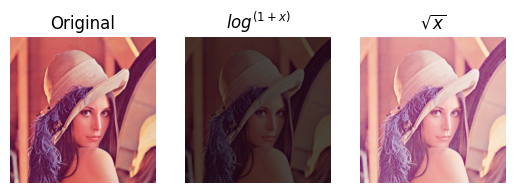

In [17]:
plt.subplot(131)
plt.imshow(im)
plt.axis('off')
plt.title('Original')
plt.subplot(132)
plt.imshow(im_1)
plt.axis('off')
plt.title('$log^{(1+x)}$')
plt.subplot(133)
plt.imshow(im_2)
plt.axis('off')
plt.title('$\sqrt{x}$')
plt.show()